In this notebook, we investigate the effects of precipitation on volcanic eruptions in the Galapagos. We use satellite precipitation data that ranges between June 6, 2000 through April 30, 2023. 12 eruptions occur in this period-- 5 at Fernandina, 2 at Cerro Azul, 3 at Sierra Negra, and 2 at Wolf. 

In [1]:
# Import necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import os

In [2]:
# Create path to data
folder_path = '/Users/jonathanquartin/Documents/Coding/GitHub/um_volcano_project/GALAPAGOS_DATA'

In [7]:
# Import tables
eruptions = pd.read_csv(os.path.join(folder_path, "eruptions_reunion.csv"))

# Choose rainfall data
rainfall = pd.read_csv(os.path.join(folder_path, "precipitation_reunion.csv"))



In [5]:
# Function used to convert date strings into floats
def date_to_decimal_year(date_str):
    date_obj = datetime.strptime(date_str, '%Y-%m-%d')
    year = date_obj.year
    day_of_year = date_obj.timetuple().tm_yday
    decimal_year = year + (day_of_year - 1) / 365.0
    decimal_year = round(decimal_year,4) 
    return decimal_year

In [9]:
print(rainfall)

             Date  Longitude  Latitude  Precipitation
0      2000-06-01     -21.15     55.45          0.000
1      2000-06-01     -21.15     55.55          0.000
2      2000-06-01     -21.05     55.45          0.000
3      2000-06-01     -21.05     55.55          0.000
4      2000-06-02     -21.15     55.45          0.000
...           ...        ...       ...            ...
33443  2023-04-29     -21.05     55.55          2.655
33444  2023-04-30     -21.15     55.45          0.000
33445  2023-04-30     -21.15     55.55          0.000
33446  2023-04-30     -21.05     55.45          0.000
33447  2023-04-30     -21.05     55.55          0.000

[33448 rows x 4 columns]


We look at 90 day rolling averages of rainfall at each volcano site. We group dates at each volcano into quintiles based on the 90 day rolling averages, and then generate a histogram to count how many eruptions fall in each quintile.

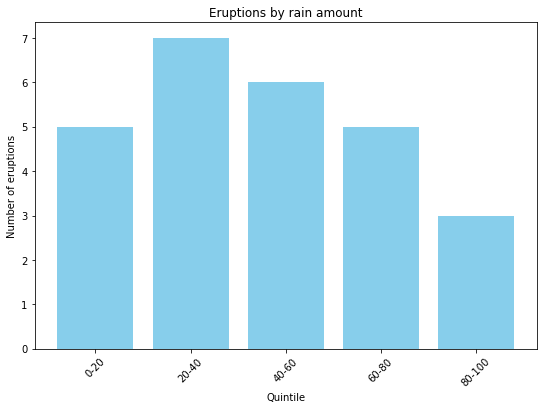

In [10]:
# Volcano longitude and latitudes are recorded in a dictionary. "Picks" is the list of volcanos whose eruptions will be considered.
volcanos = {'Fernandina': (-91.55, -.35), 'Azul, Cerro': (-91.35, -.95), 'Negra, Sierra': (-91.15, -.85), 'Wolf': (-91.35, .05)}
picks = ['Fernandina', 'Azul, Cerro', 'Negra, Sierra', 'Wolf'] #choose volcano(s)

plt.figure(figsize=(9,6))

categories = ['0-20', '20-40', '40-60', '60-80', '80-100']
values = [0,0,0,0,0]

erupt_dates = np.array(eruptions['Start'][(eruptions['Start'] >= '2000-06-01')])
rolling_rain = rainfall.copy()
rolling_rain['roll90'] = rolling_rain.Precipitation.rolling(90).mean()
rolling_rain = rolling_rain.dropna() 
all_rain = list(rolling_rain.sort_values(by=['roll90'])['Date'])
fifth = len(all_rain) // 5
for l in erupt_dates:
    values[all_rain.index(l) // fifth] += 1                 
        
plt.bar(categories, values, color='skyblue')
plt.xlabel("Quintile")
plt.ylabel("Number of eruptions")
plt.title("Eruptions by rain amount")
plt.xticks(rotation=45) 
plt.show()

8 out of 12 eruptions (66%) occur in the top 40% rainiest days. There are more eruptions in the 60-80 quintile than the 80-100 quintile, which we believe is due to existence of extended dry periods at volcano sites. In particular, the Fernandina eruptions in 2005 and 2009 and the first Sierra Negra eruption of 2005 occur in the 60-80 quintile of rain, but occur in years that have no days from the 80-100 quintile. Hence these 3 eruptions should be thought of as occuring in the rainiest period within that local time frame.

Below, we plot rainfall at both volcano sites, and color code rain quintiles-- yellow being the 80-100 quintile, black being the 60-80 quintile and red being the 40-60 quintile.

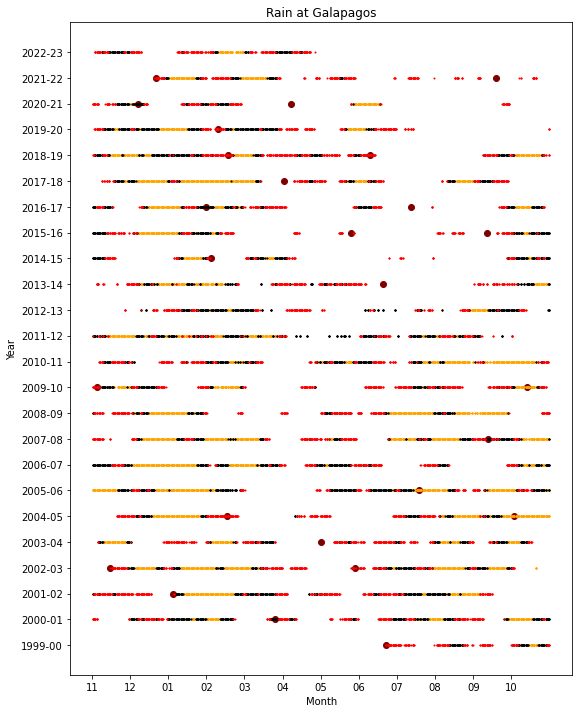

In [13]:
# Generates a plot of eruptions for each volcano listed in "picks", along with color coding of the top three quintiles of rainfall. 
volcanos = {'Fernandina': 'F', 'Azul, Cerro': 'CA', 'Negra, Sierra': 'SN', 'Wolf': 'W', 'Marchena': 'M', 'Alcedo': 'A'}
picks = ['Fernandina', 'Negra, Sierra']

eruptions['Decimal'] = eruptions.Start.apply(date_to_decimal_year)

erupt_dates = np.array(eruptions['Decimal'][(eruptions['Start'] >= '2000-06-01')])
rolling_galapagos = rainfall.copy()
rolling_galapagos['roll90'] = rolling_galapagos.Precipitation.rolling(90).mean()
rolling_galapagos['Decimal'] = rolling_galapagos.Date.apply(date_to_decimal_year)
rolling_galapagos = rolling_galapagos.dropna()

plt.figure(figsize=(9,12))

volc_x = [((i + (2/12)) % 1) for i in erupt_dates]
volc_y = [(i + (2/12)) // 1 for i in erupt_dates]
plt.scatter(volc_x, volc_y, color='maroon')

dates = rolling_galapagos.sort_values(by=['roll90'])['Decimal']
x = np.array((dates + (2/12)) % 1)
y = np.array((dates + (2/12)) // 1)
bin_size = len(x) // 5
plt.scatter(x[-bin_size:], y[-bin_size:], color='orange', s =1)
plt.scatter(x[-(2*bin_size):-bin_size], y[-(2*bin_size):-bin_size], color='black', s =1)
plt.scatter(x[-(3*bin_size):-(2*bin_size)], y[-(3*bin_size):-(2*bin_size)], color='red', s =1)


plt.yticks([2000+k for k in range(24)], [str(1999+k) + '-' + str(2000+k)[2:4] for k in range(24)])
plt.xticks([(1/12)*k for k in range(12)], ['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'])
plt.xlabel("Month") 
plt.ylabel("Year") 
plt.title('Rain at Galapagos') 
plt.show() 

Should we be counting the second fernandina in 1968? (ignore?)

First Sierra Negra was overdue, so ignore?

1988 Fernandina was overdue and in a very dry year. (ignore?)

Maybe 2017 Cerro Azul came after precisely enough rain?

NEED BETTER DATA THEN AYORA CAN PROVIDE.

In [50]:
print(eruptions[12:])

          Volcano       Start         End  Max Explosivity During El Nino  \
12     Fernandina  1981-08-01        None                0              n   
13           Wolf  1982-08-28  1982-09-06                1              y   
14     Fernandina  1984-03-30        None                1              n   
15     Fernandina  1988-09-14  1988-09-16                2              n   
16     Fernandina  1991-04-19  1991-04-24                2              n   
17       Marchena  1991-09-25  1991-11-16                2              y   
18         Alcedo  1993-12-05        None                1              n   
19     Fernandina  1995-01-25  1995-04-08                2              y   
20  Negra, Sierra  1998-01-11        None                0              n   
21    Azul, Cerro  1998-09-15  1998-10-21                1              n   
22  Negra, Sierra  2005-04-16        None                0              n   
23     Fernandina  2005-05-13  2005-05-29                2              n   